In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np
import cv2
import glob
import os
import random
import time
import datetime
import h5py

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [3]:
from maskrcnn_benchmark.config import cfg
from predictor2 import COCODemo

In [4]:
config_file = "e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])
cfg.merge_from_list(["TEST.IMS_PER_BATCH", 16])
cfg.merge_from_list(["DATALOADER.NUM_WORKERS", 8])

In [5]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

In [6]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

In [7]:
# https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
def resize2SquareKeepingAspectRation(img, size, interpolation):
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    if h == w: return cv2.resize(img, (size, size), interpolation)
    if h > w: dif = h
    else:     dif = w
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    if c is None:
        mask = np.ones((dif, dif), dtype=img.dtype)*255
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.ones((dif, dif, c), dtype=img.dtype)*255
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, (size, size), interpolation)

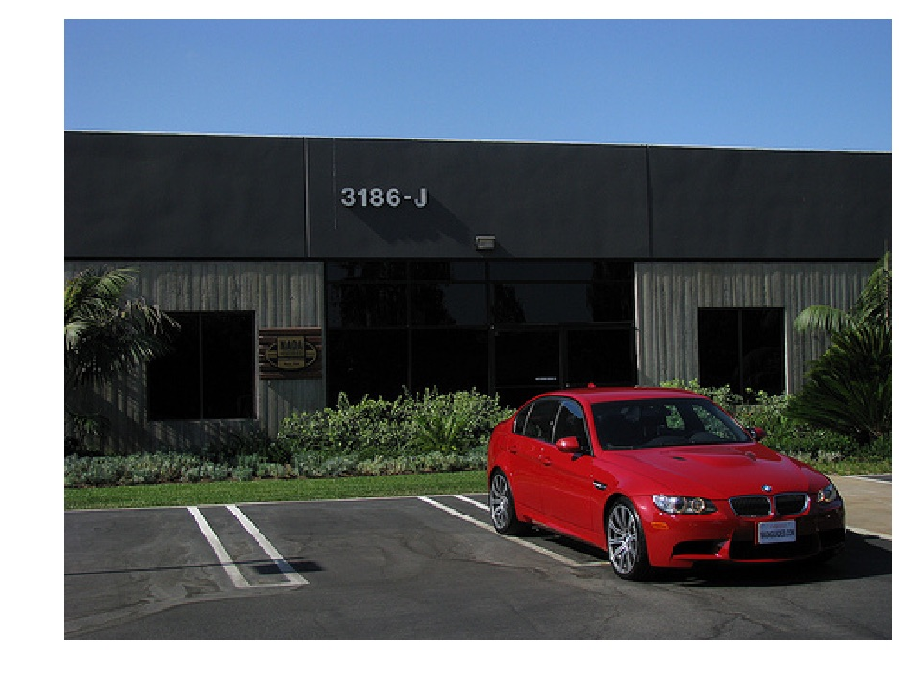

In [8]:
image = cv2.imread("car.jpg", cv2.IMREAD_COLOR)

imshow(image)

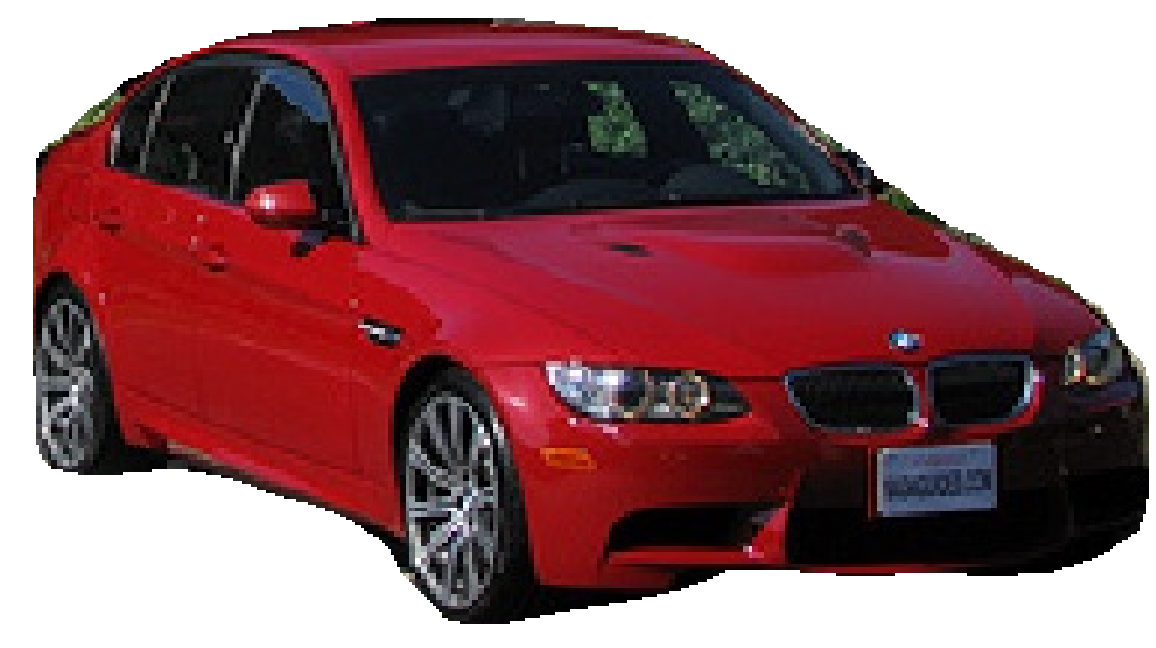

In [9]:
predictions,_ = coco_demo.run_on_opencv_image(image)
imshow(predictions)

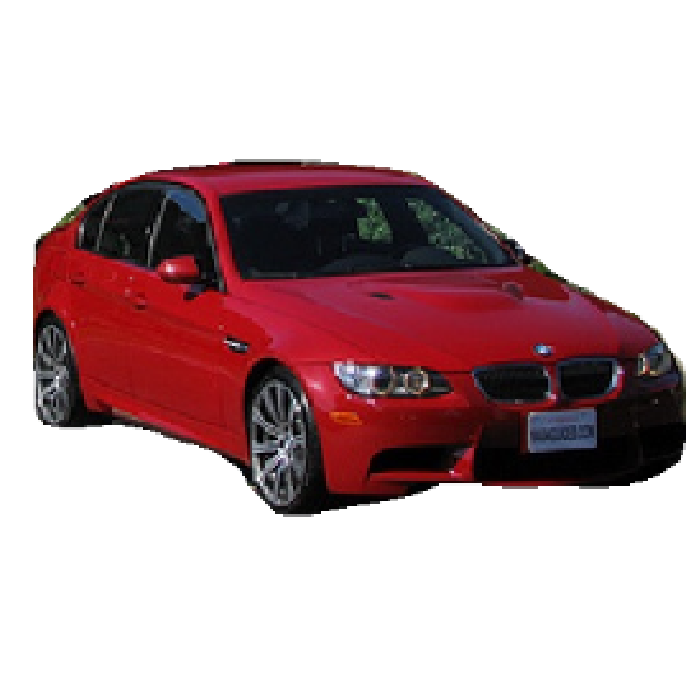

In [10]:
img = resize2SquareKeepingAspectRation(predictions, 256, cv2.INTER_AREA)
imshow(img)

In [11]:
edges = cv2.Canny(img, 200, 256)
newEdges = cv2.bitwise_not(edges)
newEdges = cv2.cvtColor(newEdges, cv2.COLOR_GRAY2BGR)

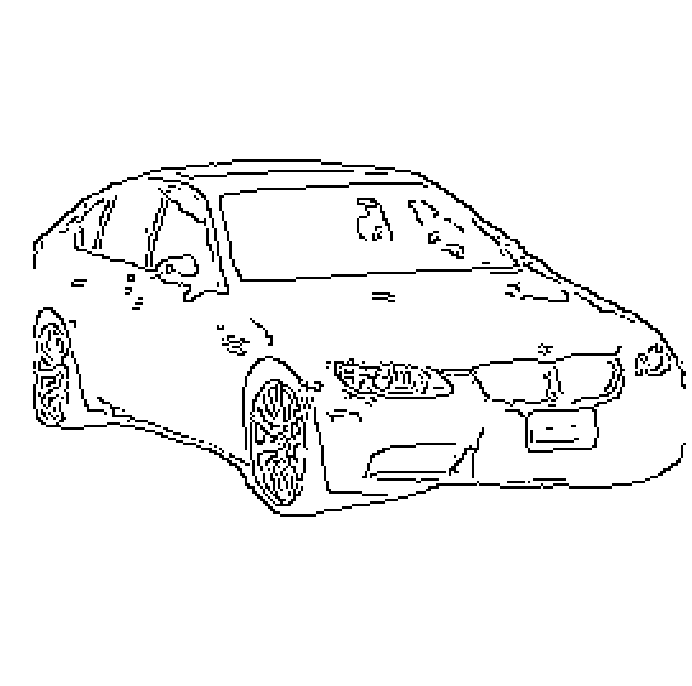

In [12]:
imshow(newEdges)

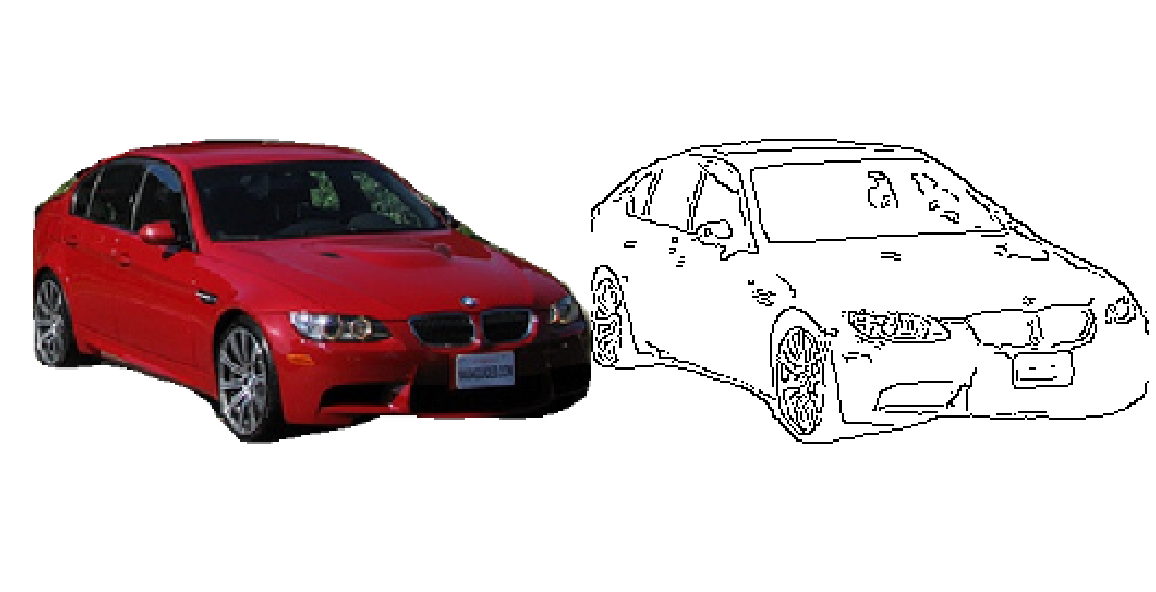

In [13]:
img = cv2.hconcat((img, newEdges))
imshow(img)

In [14]:
cv2.imwrite("demo_img/test/mycar.jpg", img)

True

In [15]:
import sys 
sys.path.append('..')

In [16]:
import os
print (os.getcwd())

os.chdir("..")

print (os.getcwd())

/home/guest/pytorch-car-pix2pix/data_preprocessing
/home/guest/pytorch-car-pix2pix


In [18]:
!/home/guest/pytorch_g/bin/python test_demo.py --dataroot /home/guest/pytorch-car-pix2pix/data_preprocessing/demo_img --name car_pix2pix_2w --model pix2pix --direction BtoA --batch_size 20 --gpu_ids 1 --num_threads 8

FIND
get_transform <function get_transform at 0x7f033e5c9d08>
Image <module 'PIL.Image' from '/home/guest/pytorch_g/lib/python3.5/site-packages/PIL/Image.py'>
__builtins__ {'sum': <built-in function sum>, 'sorted': <built-in function sorted>, 'oct': <built-in function oct>, 'callable': <built-in function callable>, 'globals': <built-in function globals>, 'bool': <class 'bool'>, 'True': True, 'zip': <class 'zip'>, 'hash': <built-in function hash>, 'ReferenceError': <class 'ReferenceError'>, '__pybind11_internals_v3__': <capsule object NULL at 0x7f03abbad7e0>, 'TabError': <class 'TabError'>, 'GeneratorExit': <class 'GeneratorExit'>, 'SystemError': <class 'SystemError'>, 'ImportError': <class 'ImportError'>, 'DeprecationWarning': <class 'DeprecationWarning'>, 'SyntaxWarning': <class 'SyntaxWarning'>, 'ascii': <built-in function ascii>, 'copyright': Copyright (c) 2001-2016 Python Software Foundation.
All Rights Reserved.

Copyright (c) 2000 BeOpen.com.
All Rights Reserved.

Copyright (c) 1

initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/car_pix2pix_2w/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------
creating web directory ./data_preprocessing/car_pix2pix_2w/test_latest
processing (0000)-th image... ['/home/guest/pytorch-car-pix2pix/data_preprocessing/demo_img/test/mycar.jpg']


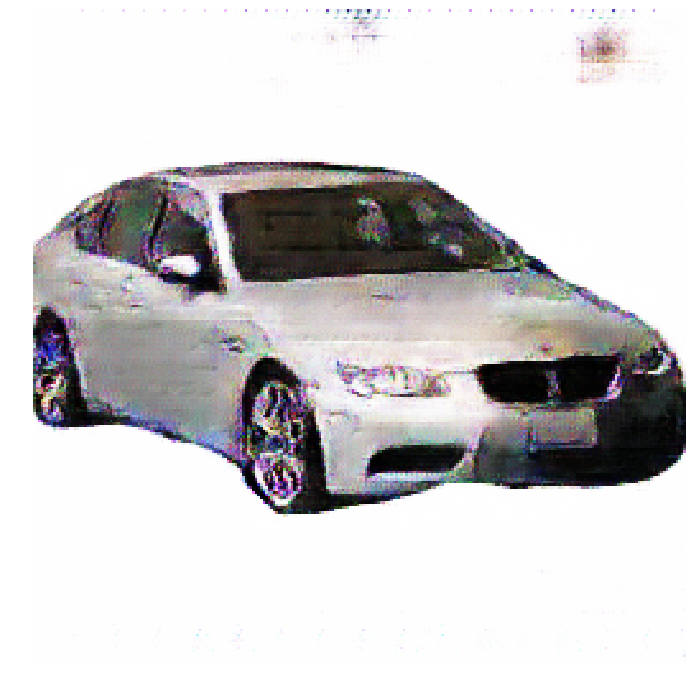

In [19]:
image = cv2.imread("data_preprocessing/car_pix2pix_2w/test_latest/images/mycar_fake_B.png", cv2.IMREAD_COLOR)

imshow(image)